In [35]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyesg 
from evaluation import fanchart
import preproccessing as prep 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
acwi = pd.read_csv('acwi_25.08.23.csv')
acwi.index = pd.DatetimeIndex(acwi['Date'])
acwi = acwi['MSCI ACWI'].loc['1998-01-01':]
eur_pln = prep.loadStooqData('EURPLN','1998-01-01','m').loc[:'2023-08-01']
eur_pln.index = acwi.index


<AxesSubplot:xlabel='Date', ylabel='MSCI ACWI'>

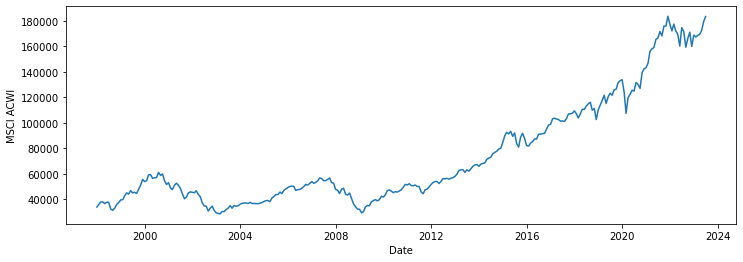

In [37]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=acwi,ax=ax)

In [39]:
acwi_returns = prep.log_returns(acwi)
acwi_returns.describe()

count    306.000000
mean       0.005510
std        0.043401
min       -0.155028
25%       -0.014354
50%        0.010903
75%        0.031779
max        0.114884
Name: MSCI ACWI, dtype: float64

In [40]:
annualized_mean = acwi_returns.mean() * 12
annualized_std = acwi_returns.std() * np.sqrt(12)
print(annualized_mean)
print(annualized_std)

0.06611432656623924
0.15034706243894605


In [46]:
eur_pln_ret = prep.log_returns(eur_pln)
eur_pln_ret.describe()

count    306.000000
mean       0.000465
std        0.023970
min       -0.072786
25%       -0.015549
50%       -0.001255
75%        0.013100
max        0.090953
Name: Zamkniecie, dtype: float64

In [66]:
annualized_mean = eur_pln_ret.loc['1999-01-01':].mean() * 12
#annualized_std = eur_pln_ret.loc['1999-01-01':].std() * np.sqrt(12)
annualized_std = eur_pln_ret.loc['2004-01-01':].std() * np.sqrt(12)
print(annualized_mean)
print(annualized_std)

0.0030293579059863353
0.07581839637980695


<AxesSubplot:xlabel='Date'>

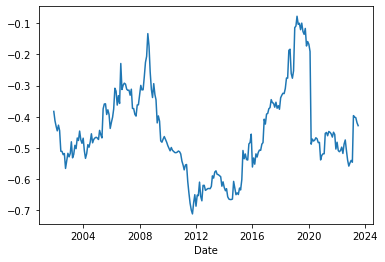

In [64]:
corr_acwi_eur = acwi_returns.loc['1999-01-01':].rolling(36).corr(eur_pln_ret.loc['1999-01-01':])
sns.lineplot(data=corr_acwi_eur)


In [65]:
#corr_acwi_eur = acwi_returns.loc['1999-01-01':].corr(eur_pln_ret.loc['1999-01-01':])
corr_acwi_eur = acwi_returns.loc['2012-01-01':].corr(eur_pln_ret.loc['2012-01-01':])

corr_acwi_eur

-0.4350612007521658

In [59]:
def foreign_asset_std(asset_std, currency_std, corr):
    variance = asset_std**2 + currency_std**2 + 2*corr*asset_std*currency_std
    return np.sqrt(variance)

In [69]:
foreign_asset_std(0.15,0.075,-0.43)

0.13583077707206123

In [53]:
model = pyesg.GeometricBrownianMotion(mu=0.073,sigma=0.17)
scenarios = model.scenarios(100,1,600,20)

In [54]:
np.savetxt('acwi_scenarios.csv', scenarios)

In [55]:
perc = np.percentile(scenarios,[1,5,25,50,75,95,99],axis=0)
#fanchart(None, perc)

In [60]:
def percentile_summary(perc):
    perc_dict = {'perc': ['1','5','25','50','75','95','99'],
                 '1': perc[:,1],
                 '2': perc[:,2],
                 '3': perc[:,3],
                 '5': perc[:,5],
                 '10': perc[:,10],
                 '15': perc[:,15],
                 '20': perc[:,20]
                 }
    
    perc_summary = pd.DataFrame(perc_dict)
    perc_summary.set_index('perc', inplace=True)
    return perc_summary
percentile_summary(perc)

,1,2,3,5,10,15,20
perc,,,,,,,
1,71.433490,65.590273,61.704471,57.604493,55.411506,58.220588,69.780216
5,79.923764,77.219288,74.731849,74.398758,78.298002,89.944130,99.437853
25,93.915607,95.760189,98.682515,107.639268,125.846948,162.514832,194.592241
50,106.009369,113.768314,121.812406,137.995997,179.595840,241.208376,341.372956
75,119.142104,133.803187,146.637709,172.717452,252.605723,371.116352,547.694153
95,139.821551,163.055562,181.539975,235.268887,409.588129,731.705488,1210.038356
99,153.871682,189.817241,232.309840,291.915283,563.065005,966.926987,1850.834165


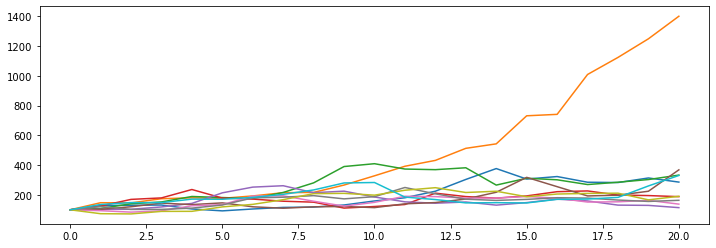

In [76]:
ax,fig = plt.subplots(figsize=(12,4))
for i in np.random.randint(0,600,10):
    sns.lineplot(data=scenarios[i])

In [73]:
T = 20
cagr = (scenarios[:,T]/scenarios[:,0])**(1/T)-1


In [74]:
np.percentile(cagr,[1,5,25,50,75,95,99])

array([-0.01783154, -0.00028187,  0.03384672,  0.06331372,  0.08874679,
        0.13276531,  0.15709324])

In [81]:
below_zero = np.round(np.count_nonzero(scenarios<100,axis=0)/600,2)

In [ ]:
#variance of foreign asset
# Calculate the variance of the foreign asset
variance_foreign_asset = std_dev_asset**2 + std_dev_foreign_currency**2 + 2*correlation*std_dev_asset*std_dev_foreign_currency

# Calculate the standard deviation of the foreign asset
std_dev_foreign_asset = np.sqrt(variance_foreign_asset)